In [1]:
#Importing libraries

import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import random


In [2]:
#Correct code function 

Capacity = 10 #Gbit/s
tau_time = 0.000005 #s
L_file = 32000 #Gbit, 4000 GB, -size of the file to which the job is applied
L_out = 32000 #Gbit, 4000 GB, output of the task
E_X_time = 28800 #sec, mean of the random variable
T_0_time = 30 #sec, fixed set-up time of the job running on one server (A)
csi = 0.1 #numerical coefficient
fraction = 48/1500 #fraction of the original data (overhead)
n = 64 #number of ports
s = int((pow(n,3))/4) #number of servers per topology


def response_time_func(C,tau,L_f,L_o,E_X,T_0,f,N):
    
    E_X_i = E_X/N 
    input_data = L_f/N
    overhead_input = input_data*f
    
    low = 0.0                 
    high = (2*L_o)/N
    
    response = []
    sum_one_over_T_j = 0
    T_i_list = []
    one_over_T_i_list = []

    theta = 0

    for i in range(1,N+1):
    
        if i <= 31:
                    
            T_i = 2 * tau * 2
            one_over_T_i = 1/T_i
            sum_one_over_T_j += one_over_T_i
            one_over_T_i_list.append(one_over_T_i)

            
        elif i > 31 and i <= 992:
        
            T_i = 2 * tau * 4
            one_over_T_i = 1/T_i
            sum_one_over_T_j += one_over_T_i
            one_over_T_i_list.append(one_over_T_i)
    
        elif i > 992 and i <= 64512:
        
            T_i = 2 * tau * 6
            one_over_T_i = 1/T_i
            sum_one_over_T_j += one_over_T_i
            one_over_T_i_list.append(one_over_T_i)
    

    
    for i in range(1,N+1):
    
        #Valutazione del tempo di esecuzione del server
        X_i = np.random.exponential(scale = E_X_i)
        task_time = T_0 + X_i
        theta += task_time
    
        #Valutazione size output
        L_o_i = np.random.uniform(low = low, high = high)
    
        #Overhead
        overhead_output = L_o_i * f 
    
        #throughput
        tp = C * (one_over_T_i_list[i-1]/sum_one_over_T_j)
    
        #valutazione tempo andata
        forward_time = (input_data+overhead_input)/tp
    
        #valutazione tempo ritorno
        return_time = (L_o_i+overhead_output)/tp
    
        r_t = forward_time + task_time + return_time
    
        response.append(r_t)
    
    

    response_time = np.max(response)

    return(response_time, theta)
    
        


In [3]:
#simulation to find E[R] as a function of N

num_sim = 100

E_R_list = []
E_theta_list = []




for e in range(1,10000+1,100):

    num_server = e
    sample_R = []
    sample_theta = []
    
    for i in range(num_sim):
        
        R, th = response_time_func(Capacity,tau_time,L_file,L_out,E_X_time,T_0_time,fraction,num_server)
        sample_R.append(R)
        sample_theta.append(th)
    
    E_R = np.mean(sample_R)
    E_R_list.append(E_R)
    E_theta = np.mean(sample_theta)
    E_theta_list.append(E_theta)


In [4]:
#simulation to find E[R_baseline]

num_sim = 100
sample_R_baseline = []

for i in range(num_sim):
    #execution time
    X = np.random.exponential(scale = E_X_time)
    server_time = T_0_time + X
    sample_R_baseline.append(server_time)
    
E_R_baseline = np.mean(sample_R_baseline)



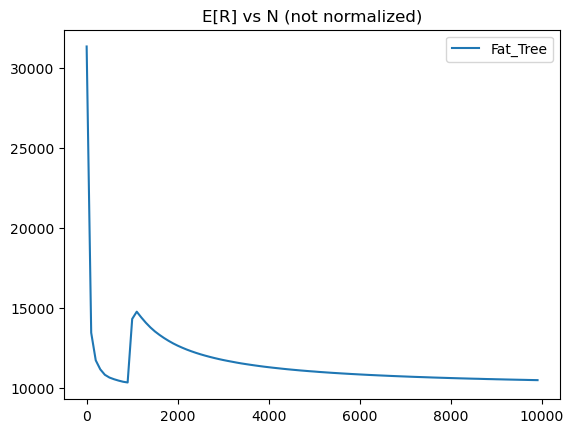

In [5]:
#not normalized plot

x = []

for i in range(1,10000+1,100):
    x.append(i)

plt.title('E[R] vs N (not normalized)')
plt.plot(x, E_R_list, label = 'Fat_Tree')
plt.legend()
plt.show()

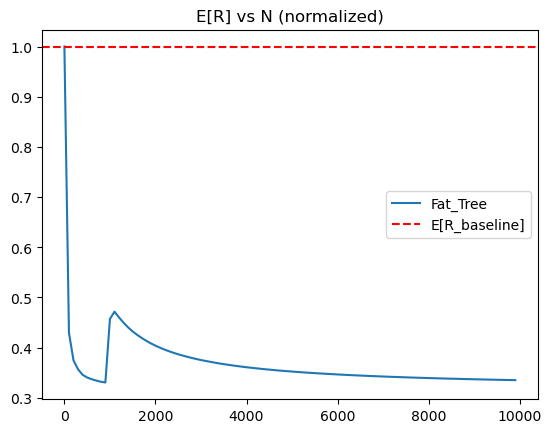

In [6]:
#normalized plot

x = []

for i in range(1,10000+1,100):
    x.append(i)
    
E_R_normalized = E_R_list/E_R_baseline

plt.title('E[R] vs N (normalized)')
plt.plot(x, E_R_normalized, label = 'Fat_Tree')
plt.axhline(y = 1.0, color = 'r', linestyle = '--', label = 'E[R_baseline]')
plt.legend()
plt.show()

In [7]:
#job running cost as a function of N

E_R_array = np.array(E_R_list)
E_theta_array = np.array(E_theta_list)

S = E_R_array + (csi * E_theta_array)

In [8]:
#S_baseline
S_baseline = E_R_baseline + (csi * E_R_baseline)

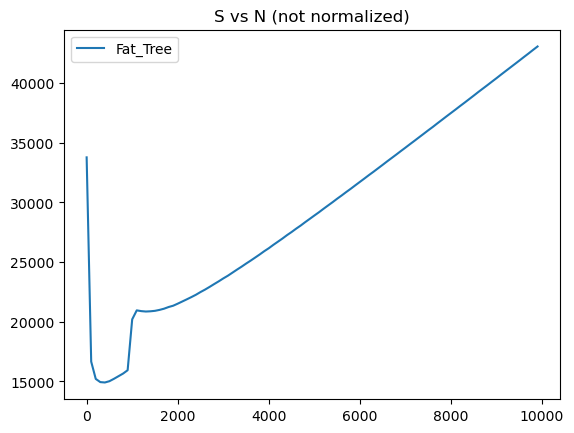

In [9]:
#not normalized plot

x = []

for i in range(1,10000+1,100):
    x.append(i)
    
plt.title('S vs N (not normalized)')
plt.plot(x, S, label = 'Fat_Tree')
plt.legend()
plt.show()

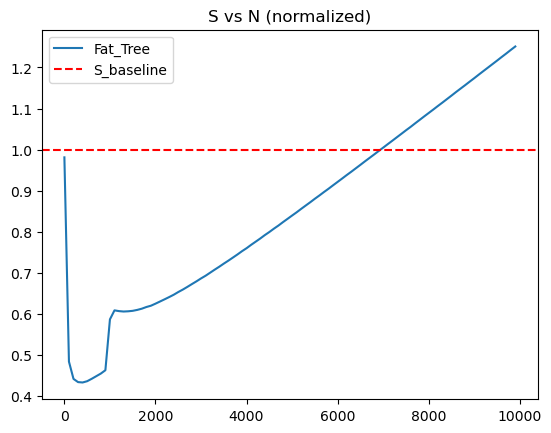

In [10]:
#normalized plot

x = []

for i in range(1,10000+1,100):
    x.append(i)
    
S_normalized = S/S_baseline

plt.title('S vs N (normalized)')
plt.plot(x, S_normalized, label = 'Fat_Tree')
plt.axhline(y = 1.0, color = 'r', linestyle = '--', label = 'S_baseline')
plt.legend()
plt.show()